# DATA SCIENCE PROJECT: ADULT CENSUS INCOME

SAMUEL JOHN AIGBORNA

Economics and statistics,

University of Benin,

Abuja, Nigeria

Email: aigbornajohnrpnsamuel@gmail.com

# INTRODUCTION/Problem Statment:

   This project is aimed at explaining the income of individual especially adult across different country. which is aimed at explaining if larger population are the higher income bracket or not. The Adult dataset is from the Census Bureau and the task is to predict whether a given adult makes more than $50,000 a year based attributes such as education, hours of work per week, etc.Over the last three decades, humans have had a lot of dependence on data and information in society and with prior to the emergence and growth of technologies. Technologies have evolved for their storage, analysis and processing on a huge scale for the purpose of interpretation. The fields of Data Mining and Machine Learning have not only exploited them for knowledge and discovery but also to explore certain hidden patterns and concepts which led to the prediction of future events. The issue of income inequality has been of great concern in the recent years. This has set a huge gap between the rich and the poor.However, making the poor better off does not seem to be the sole aim to be in
quest for eradicating or reducing this issue. Citizens of the United States believe that the advent of economic inequality is unacceptable. So they demand a fair share of wealth in the society. This model actually aims to conduct an analysis to have a comprehensive insight into the major or key factors that are necessary and expedient in improving an individual's income. This analysis helps to set focus and have insight on the important areas which can significantly enhance the income levels of
individuals. This study aims to show the usage of machine learning and data mining techniques in providing asolution to the income equality problem. The UCI Adult Dataset has been used for the purpose. Classification has been done to predict whether a person's yearly income in US falls in the income category of either greater than 50K Dollars or less equal to 50K Dollars category based on a certain set of attributes.

### IMPORTING PACKAGES:

In [75]:
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
pd.set_option('display.max_columns', 100)
from pandas.plotting import parallel_coordinates
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
from matplotlib import patheffects

from cartopy import crs as ccrs

import geopandas
import os

In [76]:
!pip install pandas-profiling 

In [77]:
from pandas_profiling import ProfileReport

IMPORTING DATASET:

In [78]:
df=pd.read_excel('adult.xlsx')
df.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K


### PANDAS Profiling before Data-Preprocessing and Data-Cleaning:

To get more information about the DataFrame Use the 'Toggle details' in the overveiw below👇👇 

In [79]:
profile=ProfileReport(df)
profile

Number of variables,15
Number of observations,32561
Total Missing (%),0.0%
Total size in memory,2.6 MiB
Average record size in memory,84.0 B
Numeric,6
Categorical,9
Boolean,0
Date,0
Text (Unique),0
Rejected,0


### DATA CLEANING AND PREPROCESSING:

In [80]:
df["workclass"] = np.where(df["workclass"]=="?", "No_workclass", df["workclass"])
df["occupation"] = np.where(df["occupation"]=="?", "No_occupation", df["occupation"])
df["native.country"] = np.where(df["native.country"]=="?", "don't Know", df["native.country"])
df["education"] = np.where(df["education"]== '7th-8th', "Compulsory", df["education"])
df["education"] = np.where(df["education"]== '11th', "Compulsory", df["education"])
df["education"] = np.where(df["education"]== '1st-4th', "Compulsory", df["education"])
df["education"] = np.where(df["education"]== '5th-6th', "Compulsory", df["education"])
df["education"] = np.where(df["education"]== '12th', "Compulsory", df["education"])
df["education"] = np.where(df["education"]== '9th', "Compulsory", df["education"])
df["education"] = np.where(df["education"]== '10th', "Compulsory", df["education"])
df["education"] = np.where(df["education"]== 'Preschool', "Compulsory", df["education"])
df["education"] = np.where(df["education"]=="HS-grad", "High_school_grad", df["education"])
df["education"] = np.where(df["education"]=="Some-college", "Bachelors", df["education"])
df["education"] = np.where(df["education"]=="Assoc-acdm", "Assiociate", df["education"])
df["education"] = np.where(df["education"]== 'Assoc-voc', "Assiociate", df["education"])
df=df.drop_duplicates()
df.head(2)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,No_workclass,77053,High_school_grad,9,Widowed,No_occupation,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,High_school_grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K


In [198]:
df.shape

(32537, 15)

There are 32537 rows and 15 columns in the dataset

In [81]:
#Lets detect if there is a zero or negative value in the data frame or missing value
((df.isnull().sum())/len(df))*100 #no Zero or missing value

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education.num     0.0
marital.status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital.gain      0.0
capital.loss      0.0
hours.per.week    0.0
native.country    0.0
income            0.0
dtype: float64

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
age               32537 non-null int64
workclass         32537 non-null object
fnlwgt            32537 non-null int64
education         32537 non-null object
education.num     32537 non-null int64
marital.status    32537 non-null object
occupation        32537 non-null object
relationship      32537 non-null object
race              32537 non-null object
sex               32537 non-null object
capital.gain      32537 non-null int64
capital.loss      32537 non-null int64
hours.per.week    32537 non-null int64
native.country    32537 non-null object
income            32537 non-null object
dtypes: int64(6), object(9)
memory usage: 2.9+ MB


In [83]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


from the above Statistical describtion, it's observe that age is normally distributed with it's mean and median almost equal whose value are 38 and 37 respectively. It's positively skewed(i.e the mean is greater than the median and mode). Second, the education.num is also a normal distribution and it's positively skewed also. The average capital gain is 1078 while the capital loss is 87 which those that gain is higher than those that loss. The Hour.per.week is normally distributed and also positively sweked. For more information, check data profiling or overveiw below 👇.

In [84]:
profile=ProfileReport(df)
profile

Number of variables,16
Number of observations,32537
Total Missing (%),0.0%
Total size in memory,2.9 MiB
Average record size in memory,92.0 B
Numeric,7
Categorical,9
Boolean,0
Date,0
Text (Unique),0
Rejected,0


# Descriptive Statistics:

Text(0.5, 1.0, 'The income Distribution in the dataset')

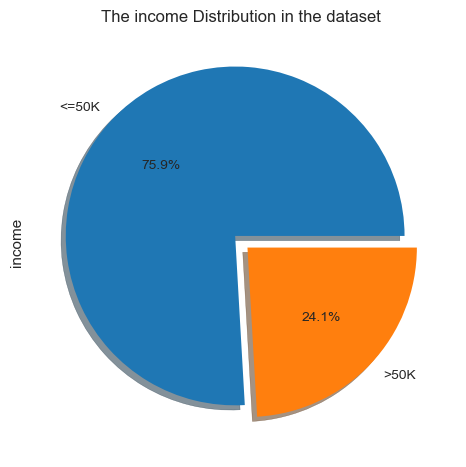

In [85]:
df['income'].value_counts().plot(kind='pie',explode=[0.05,0.05], autopct='%1.1f%%', shadow=True)
plt.title('The income Distribution in the dataset')

In [86]:
df['income'].value_counts()

<=50K    24698
>50K      7839
Name: income, dtype: int64

This means those that receives less than or equal to 50k dollar are more than those who receives more than 50k dollar per week. The pie chart above shows that 75.9 percent fall below 50k dollar and 24.1 percent receives higher income i.e above 50k dollar per week. However there are factors responsible for this. The income is the dependent variable which ps explained or affect by other variable in the dataset such as age, education, sex, race, hour per week etc which of these variable actually have higer effect and determine the distribution of income.

Text(0.5, 1.0, 'The Age Distribution')

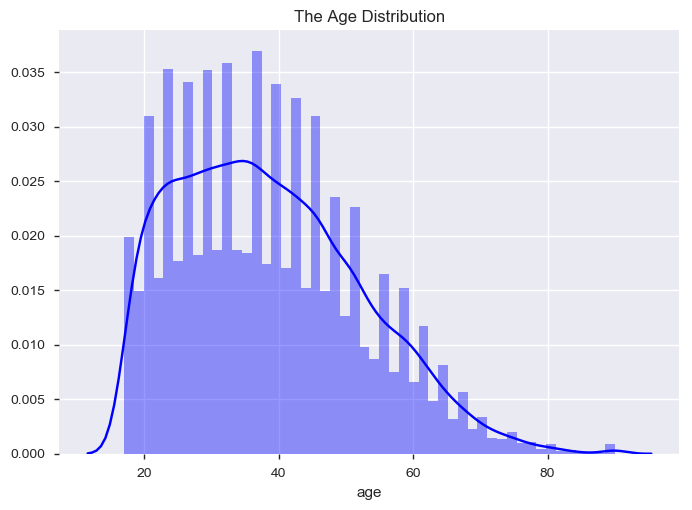

In [87]:
sns.distplot(df.age, color='blue')
plt.title('The Age Distribution')

The above distplot depict the age distribution, This means that those with the age bracket between 25 and 45 are more in the dataset. This is actually the most predominant working age. 

Text(0.5, 1.0, 'The No of education in the dataset.')

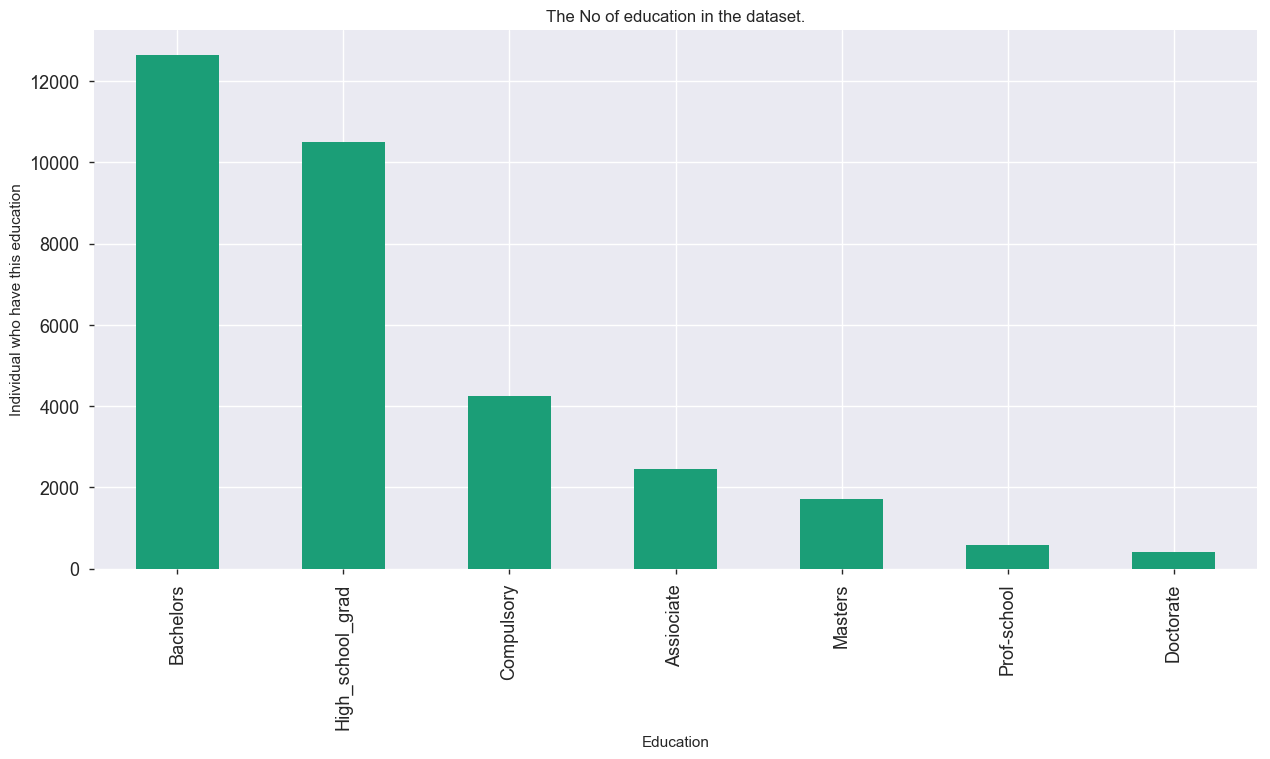

In [88]:
df['education'].value_counts().plot.bar(figsize=(15, 7), colormap='Dark2', fontsize=13)
plt.xlabel('Education')
plt.ylabel('Individual who have this education')
plt.title('The No of education in the dataset.')

This means that those with Bachelors degree are more in the Dataframe next to this is High_School_grad. statistics shows that most citizen in USA are bachelors holders, this is because as a bachelors degree holder you are already entitled to work full-time job other advance from this stage are choice which one makes to futher his/her education. Most of the working class citizen don't owned a prof-school or doctorate degree because they feel this set of education are for those who want to teach or become a professor.

Text(0.5, 1.0, 'No of years been educated in the dataset.')

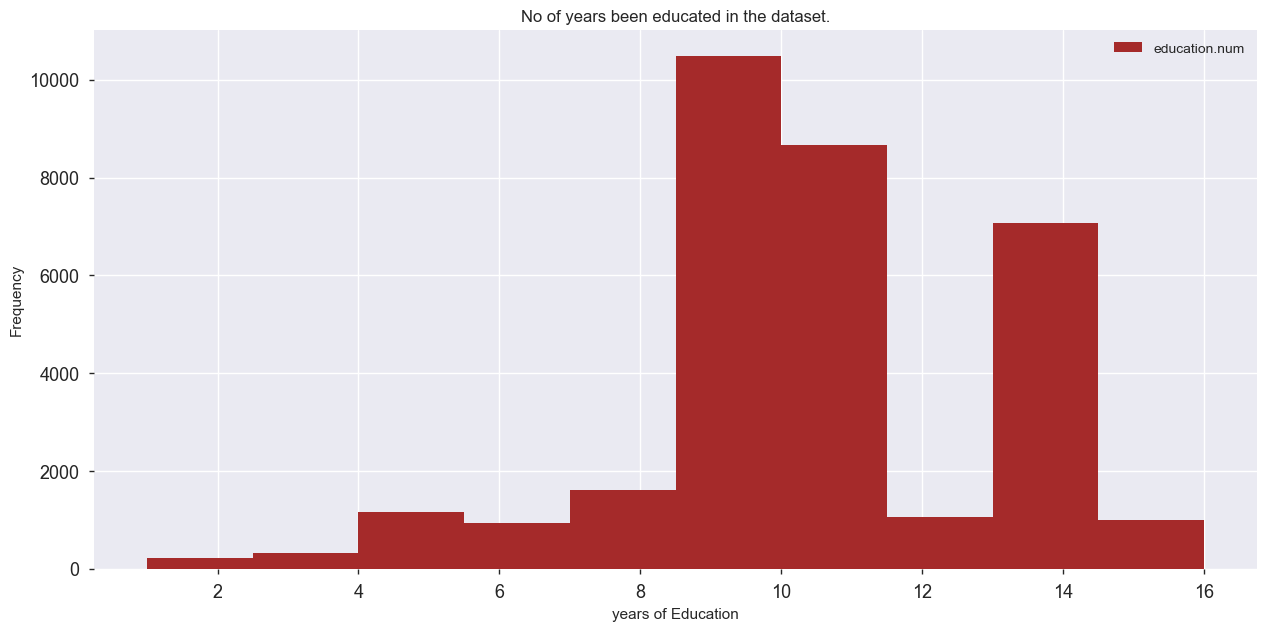

In [89]:
df[['education.num']].plot(kind='hist', figsize=(15, 7), fontsize=13, color='brown')
plt.xlabel('years of Education')
plt.title('No of years been educated in the dataset.')

from the data set, those with bachelor and high_school_grad are educated between 10-13 years.This means high population owns degree from bachelor upwards because the above graph is positively skewed. i.e the mean(average individual with the degree), median(the middle individual degree) and mode(The individuals with the most degree) lies to the right. so we can say a larger population are educated. This is because Education is one of the major perequisite to earn a high-paying Job. 

Text(0.5, 1.0, 'donunt chart showing the proportion of marital status')

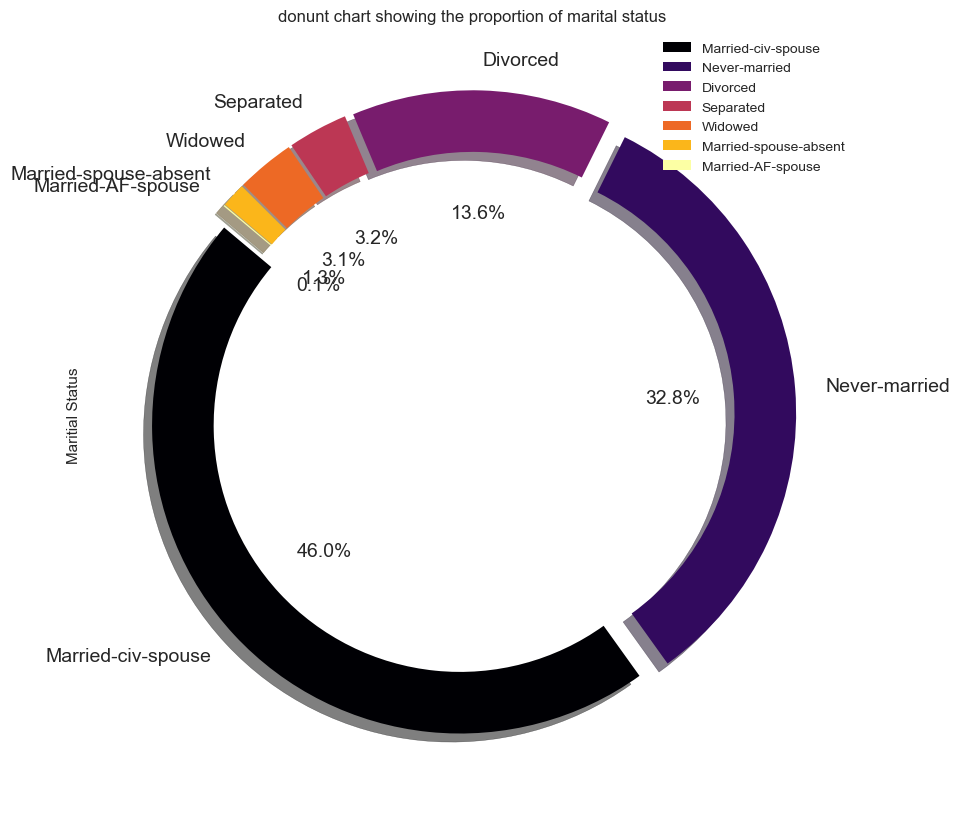

In [90]:
df['marital.status'].value_counts().plot(kind='pie', explode=np.ones(7)/19, autopct='%3.1f%%', wedgeprops=dict(width=0.2), shadow=True, startangle=140, 
                                   figsize=(10, 10), cmap='inferno', fontsize=14, legend=True)
plt.ylabel('Maritial Status')
plt.title("donunt chart showing the proportion of marital status")

From the Data_set, those who are married to civilian spouse and are not married are more.

Text(0.5, 1.0, 'donunt chart showing the proportion of occupation')

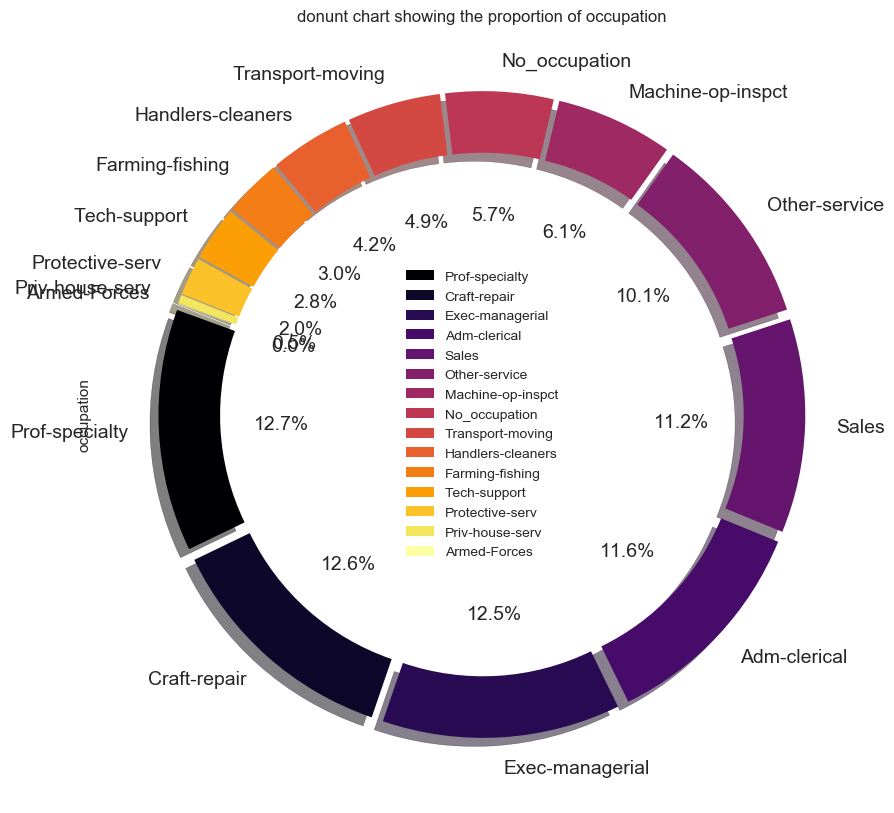

In [91]:
df['occupation'].value_counts().plot(kind='pie', explode=np.ones(15)/20, autopct='%3.1f%%', wedgeprops=dict(width=0.2), shadow=True, startangle=160, 
                                   figsize=(10, 10), cmap='inferno', fontsize=14, legend=True)
plt.ylabel('occupation')
plt.title("donunt chart showing the proportion of occupation")

Above depict the various jobs individual in the dataset have.

Text(0.5, 1.0, 'donunt chart showing the proportion of relationship')

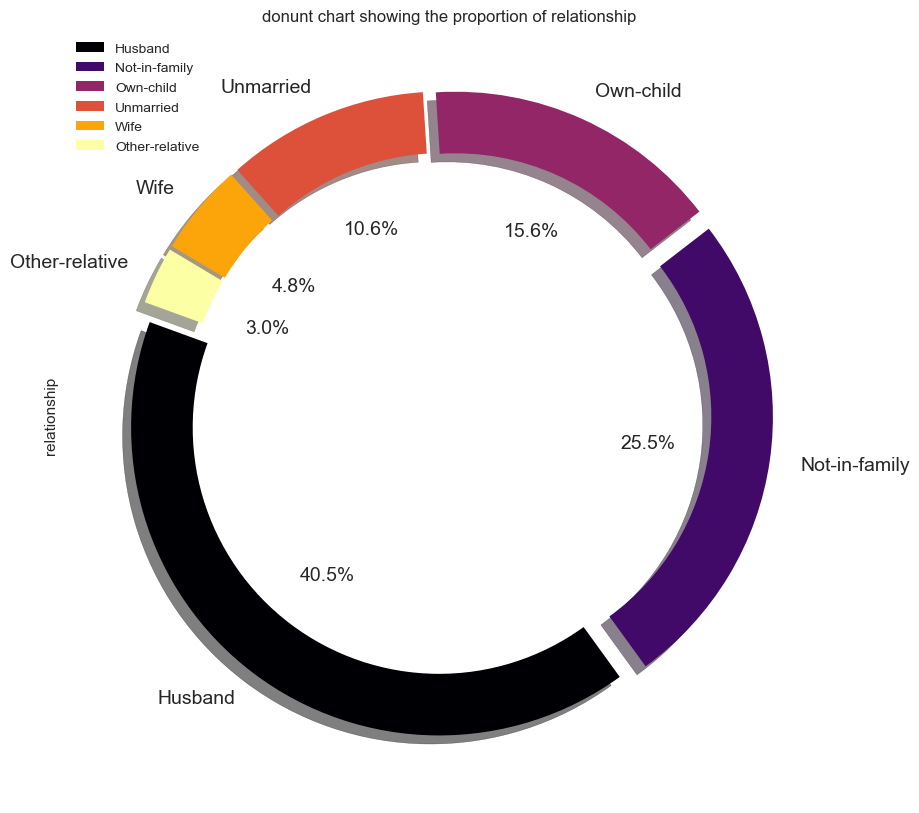

In [92]:
df['relationship'].value_counts().plot(kind='pie', explode=np.ones(6)/19, autopct='%3.1f%%', wedgeprops=dict(width=0.2), shadow=True, startangle=160, 
                                   figsize=(10, 10), cmap='inferno', fontsize=14, legend=True)
plt.ylabel('relationship')
plt.title("donunt chart showing the proportion of relationship")

It's means male who are married are more in the data_set this has to be so because they are the main persons with financial responsibity in the family.

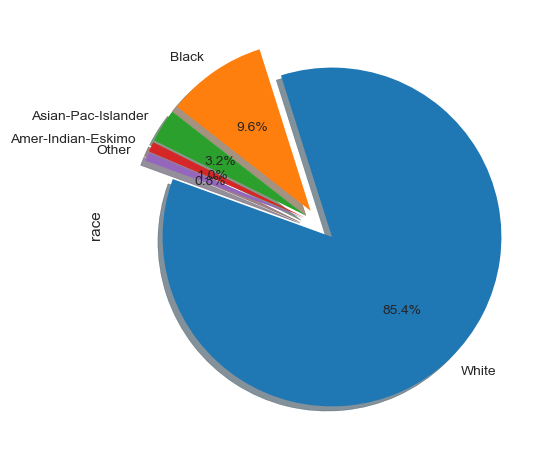

In [93]:
df['race'].value_counts().plot(kind='pie', explode=np.ones(5)/10, autopct='%1.1f%%', shadow=True, startangle=160)

This means white race are more in the data set with 85.4% then blacks 9.6% then others have the remaining percent

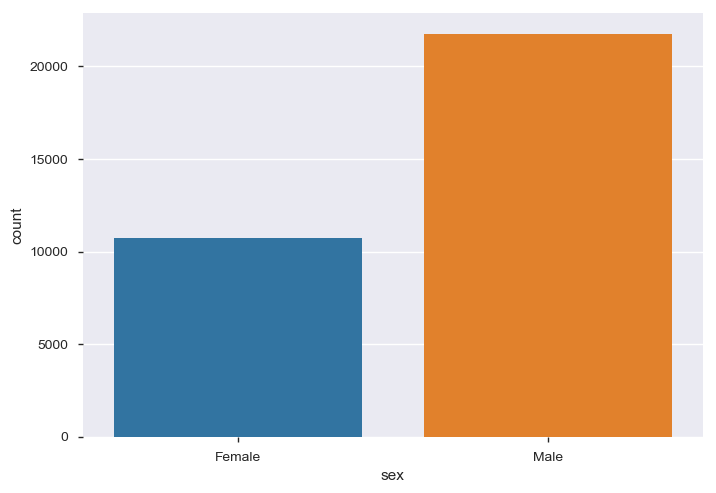

In [94]:
sns.countplot(data=df, x='sex')

In [95]:
df.sex.value_counts()

Male      21775
Female    10762
Name: sex, dtype: int64

Male are more in the Data set.

In [96]:
c1=df['capital.gain'].sum() ; c2=df['capital.loss'].sum()
print(c1)
print(c2)

35089324
2842700


There are more capital gain by individuals in the dataset than individual lose.

Text(0.5, 1.0, 'WorkHour_per_week')

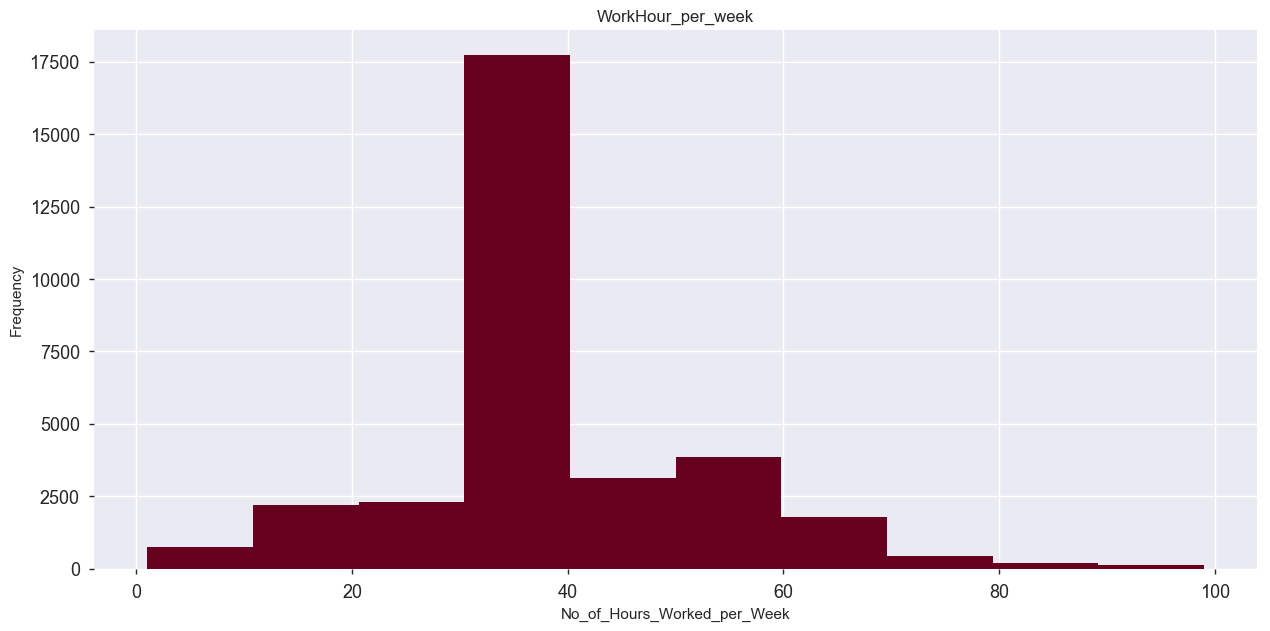

In [97]:
df['hours.per.week'].plot(kind='hist', figsize=(15, 7), fontsize=13, cmap="RdBu")
plt.xlabel('No_of_Hours_Worked_per_Week')
plt.title('WorkHour_per_week')

Base on research, an average americian works 40 hours in a week. 

Text(0.5, 1.0, 'The No of country in the dataset.')

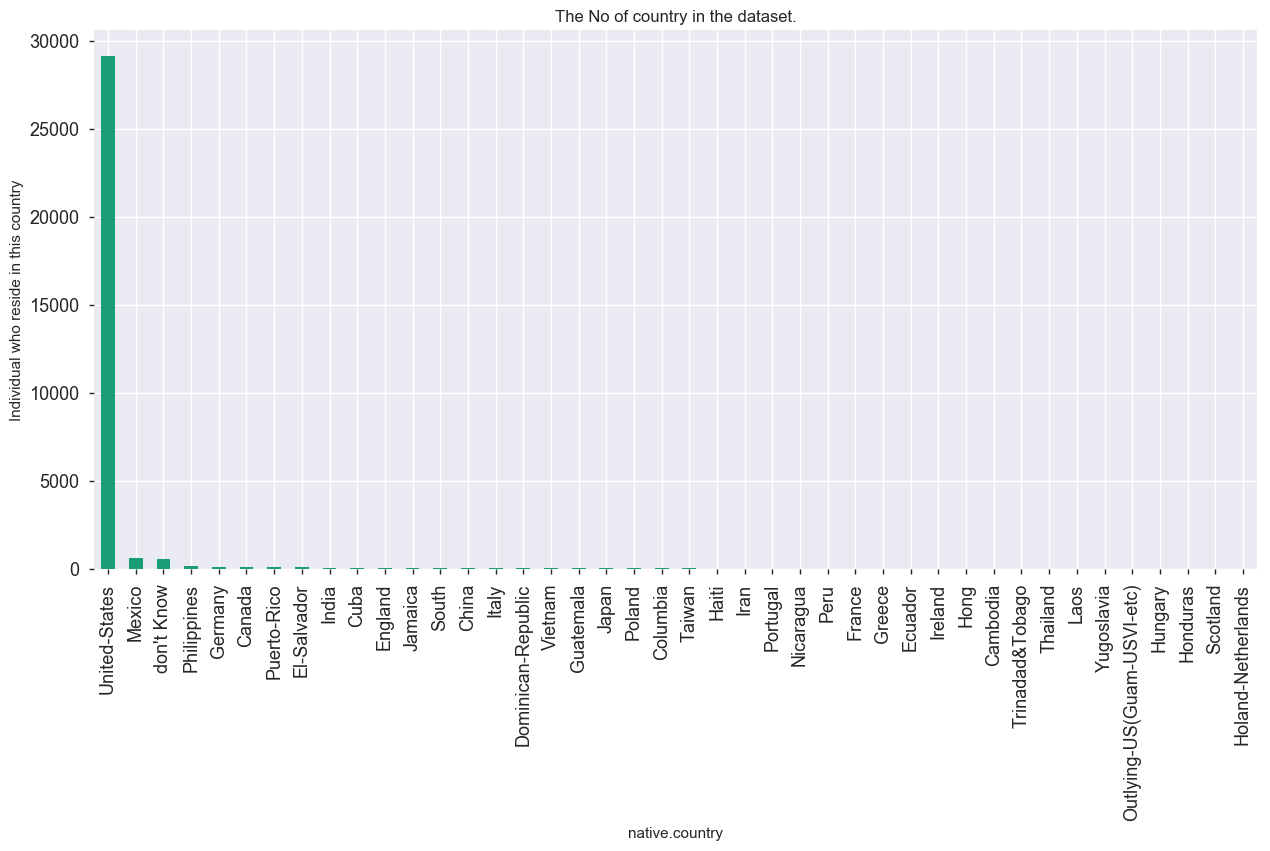

In [98]:
df['native.country'].value_counts().plot.bar(figsize=(15, 7), colormap='Dark2', fontsize=13)
plt.xlabel('native.country')
plt.ylabel('Individual who reside in this country')
plt.title('The No of country in the dataset.')

US citizens are more in the data_set.

In [99]:
df['native.country'].value_counts()

United-States                 29153
Mexico                          639
don't Know                      582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

USA are more in the Data_set while nethetland just have only one citizen.

Text(0.5, 1.0, 'Income base on Age')

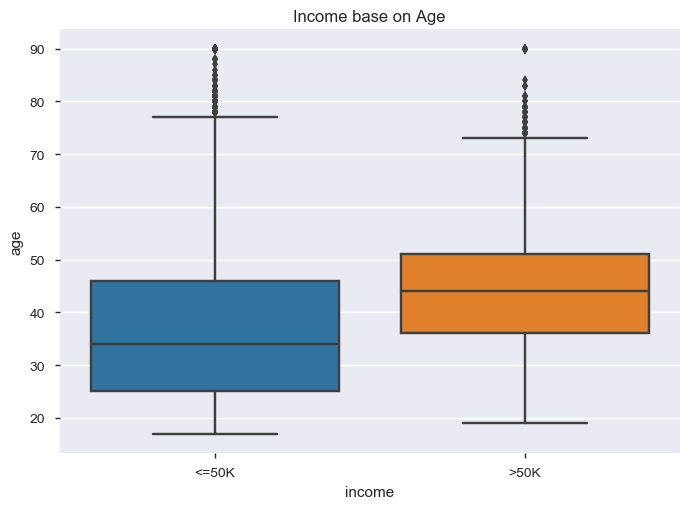

In [100]:
sns.boxplot(x='income', y='age', data=df)
plt.title('Income base on Age')

The above explains the income distribution base on age, so base on the graph above, the age bracket of individual that earn less than or equal to 50k on weekly bases lies more between 30 to 45 years respectively having the median age at around 33 to 35. while those that earn more than 50k lies between 35 to 52 more having the median age lies around 45. This is so because  those with higher age have more experience and hold major position in offices.

Text(0.5, 1.0, 'Income base on Education years')

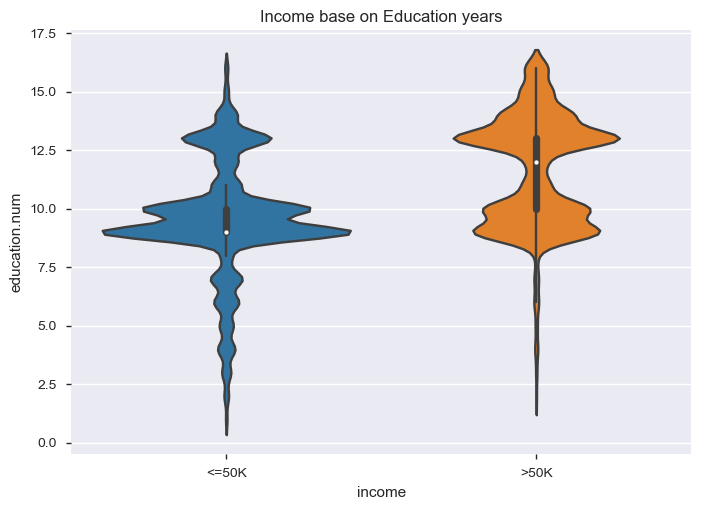

In [101]:
sns.violinplot(x='income', y='education.num', data=df)
plt.title('Income base on Education years')

The above plot shows that those with more years of education are found in the higher income group.we can see that those with income <=50k spend have 9 to 10 education while those with more than 50k are found little in 2-8 years but are found mostly in
12 to 15 years of education which means The number of years been educated have a positive impact on income been earn. 

Text(0.5, 1.0, 'Income base on capital gain')

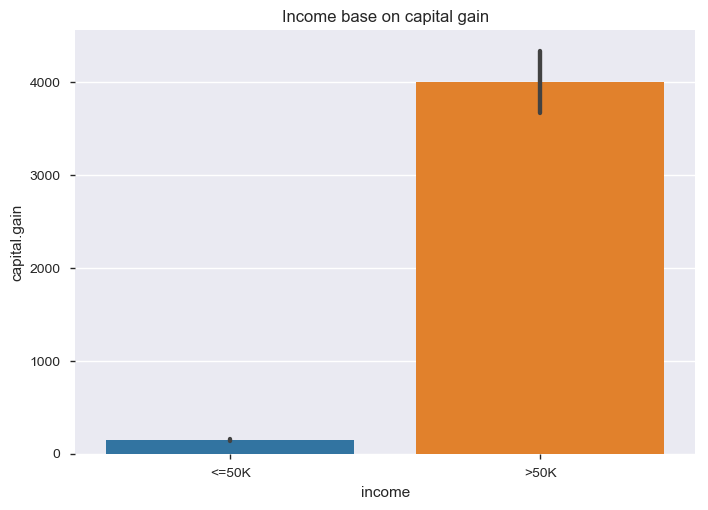

In [102]:
sns.barplot(x='income', y='capital.gain', data=df)
plt.title('Income base on capital gain')

Those who gained capital as low income earners are very little while those who earn more than 50k gained capital more. 

Text(0.5, 1.0, 'Income base on capital loss')

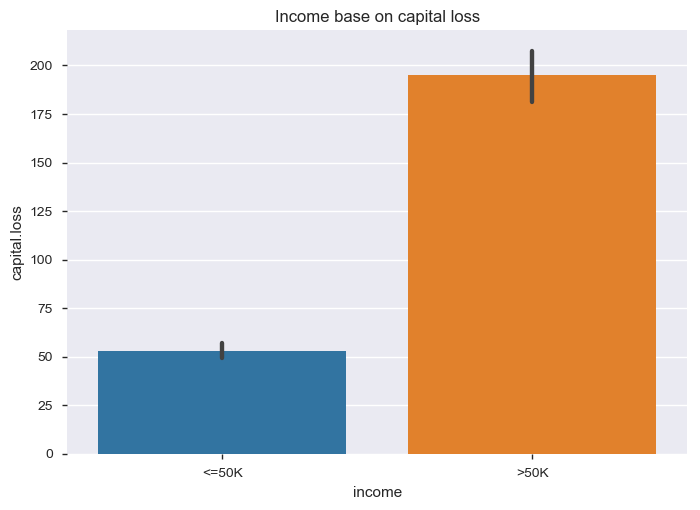

In [103]:
sns.barplot(x='income', y='capital.loss', data=df)
plt.title('Income base on capital loss')

!wow some high income  earner did not make gain capital.

Text(0.5, 1.0, 'Income base on hours Worked per week')

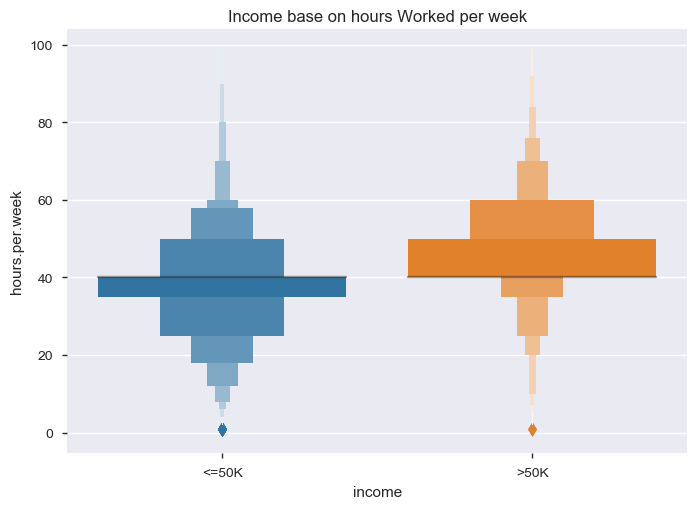

In [104]:
sns.lvplot(x='income', y='hours.per.week', data=df)
plt.title('Income base on hours Worked per week')

Base on reseach, an average american is meant to work 40hours.The above plot shows that those who work more than 40hours per week are in the gap of >50k earner while those who work less tahn 40 hours earn less than 50k more. The median work hour for individual who earn >50k is around 40 to 50 hours while those individual who earn <=50 is around 35-40 Hours. This means the higher the work hour, The higher the income earned.

In [105]:
work_class=df.groupby('workclass')['income'].value_counts()
wc=pd.DataFrame(work_class)
wc=wc.rename(columns={'income': 'values'})
wc.reset_index(inplace=True)

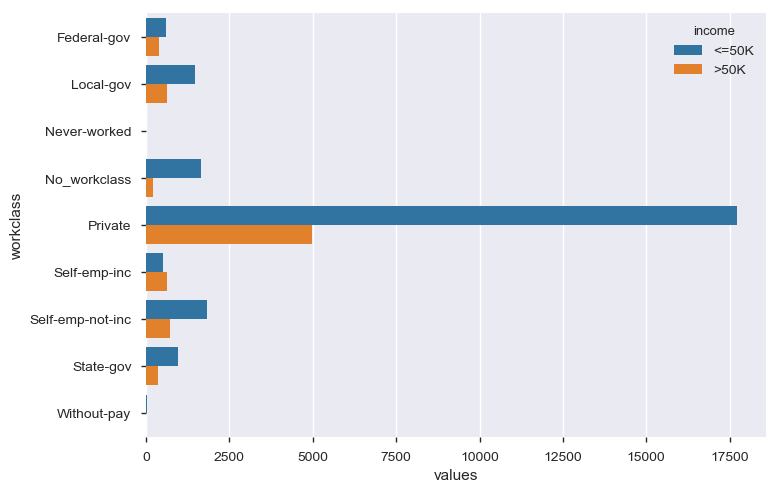

In [106]:
sns.barplot(y='workclass', x='values', hue='income', data=wc)

Those who earn >50k mostly are found in private company and those who earn <=50k are also found in private company. Been self_employed have individuals who earn >50k than those who don't. This is because the self employed person like a sole proprietors aim is to increase his inflow. while private company's is aimed at making profit so they tend not to pay workers much in some cases.

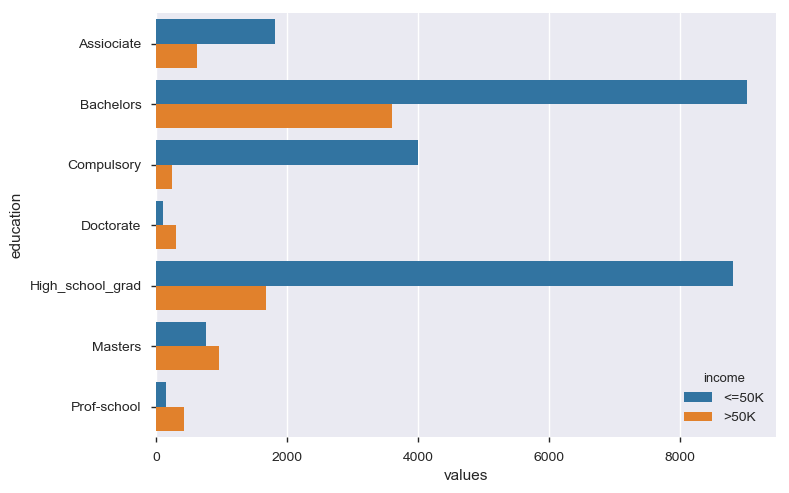

In [107]:
education_class=df.groupby('education')['income'].value_counts()
ec=pd.DataFrame(education_class)
ec=ec.rename(columns={'income': 'values'})
ec.reset_index(inplace=True)
sns.barplot(y='education', x='values', hue='income', data=ec)

higher income earners and  lower income earner are found more as bachelors degree holders. This is because most individual ends their Education as a bachelors degree holder and maybe most of them tend to work in a private company. But those with masters, prof-school and doctorate tend to have higher income earners than lower income earners. This is because those with this degree are highly recommendable and higher needed by company because of their experience and Knowledge they have gathered. 

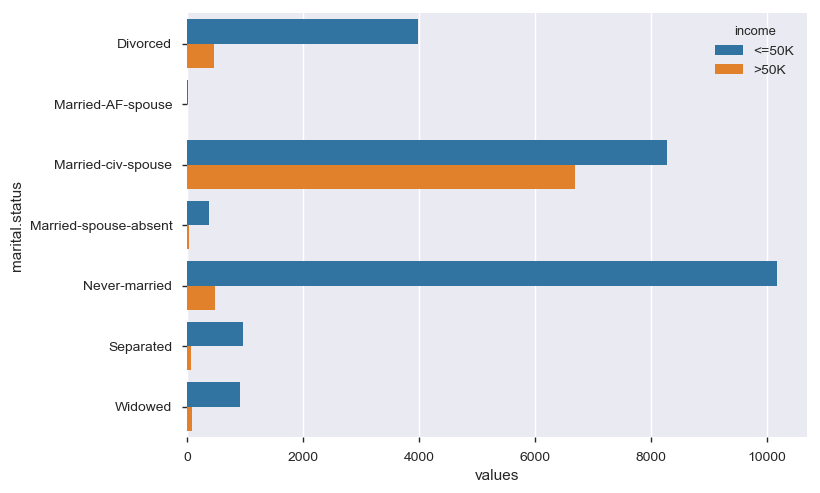

In [108]:
marital_status=df.groupby('marital.status')['income'].value_counts()
ms=pd.DataFrame(marital_status)
ms=ms.rename(columns={'income': 'values'})
ms.reset_index(inplace=True)
sns.barplot(y='marital.status', x='values', hue='income', data=ms)

Higher income earners are mostly married to a civilian spouse. I think the reason for this is because they receive assistance from their spouse so they also have enough time to work more hours. while those seperated, widowed, married-spouse-absent, divorced earn low income more i think this is because they don't have assisstance from any partner.

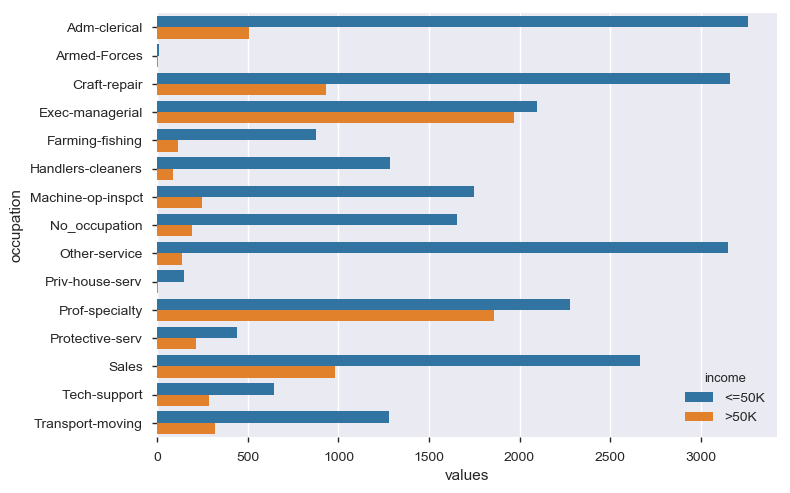

In [109]:
occupation_df=df.groupby('occupation')['income'].value_counts()
od=pd.DataFrame(occupation_df)
od=od.rename(columns={'income': 'values'})
od.reset_index(inplace=True)
sns.barplot(y='occupation', x='values', hue='income', data=od)

Thsoe who work as Exec-managerial and prof-speciality position earn >50k. This means the position is a big position. those who work as priv-house-service, handlers-cleaners, armed forces, farming-fishing earn more <50k. This means this job are low paying job.

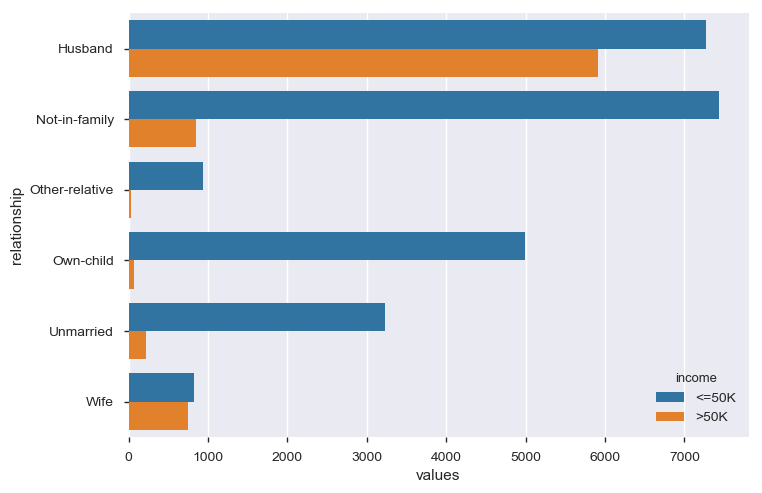

In [110]:
relationship_df=df.groupby('relationship')['income'].value_counts()
rd=pd.DataFrame(relationship_df)
rd=rd.rename(columns={'income': 'values'})
rd.reset_index(inplace=True)
sns.barplot(y='relationship', x='values', hue='income', data=rd)

Those who own children earn <50k.This is because they need enough time to cater, care for their children. Husband earn more than 50k, This is because man responsibility is to work and provide for the family so he has to create enough time for work.

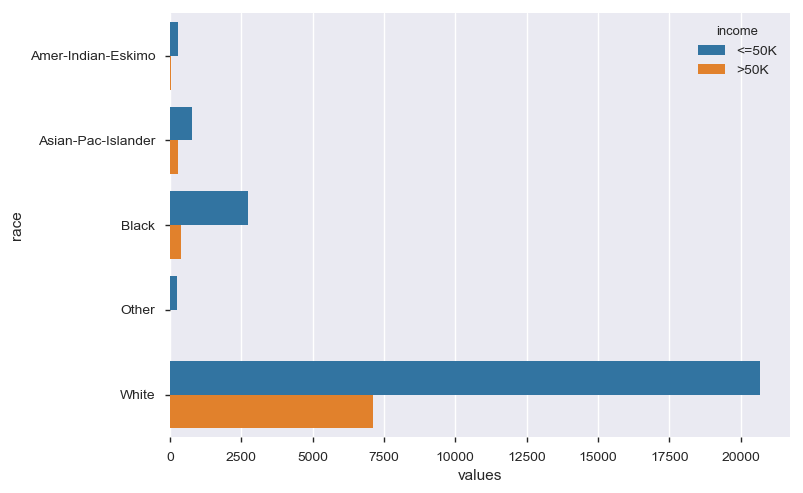

In [111]:
race_df=df.groupby('race')['income'].value_counts()
rad=pd.DataFrame(race_df)
rad=rad.rename(columns={'income': 'values'})
rad.reset_index(inplace=True)
sns.barplot(y='race', x='values', hue='income', data=rad)

white race are represented more because the countries represented, most are europian country which has more white race than others.

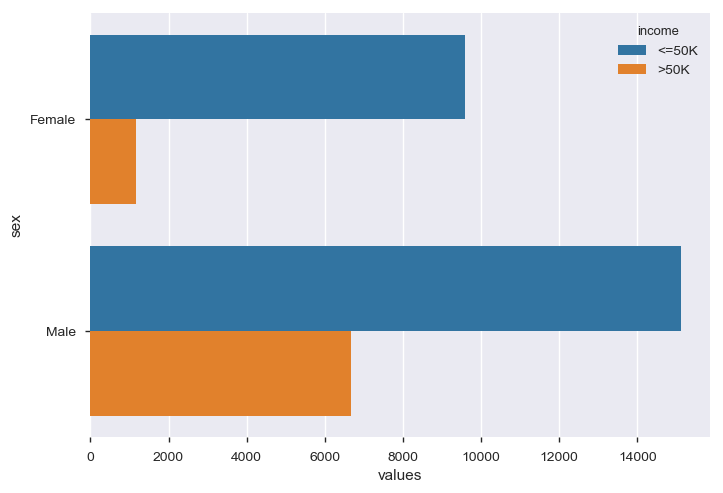

In [112]:
sex_df=df.groupby('sex')['income'].value_counts()
sd=pd.DataFrame(sex_df)
sd=sd.rename(columns={'income': 'values'})
sd.reset_index(inplace=True)
sns.barplot(y='sex', x='values', hue='income', data=sd)

male are more in the data_set and most higher income earners are male. This is because they have enough time to work and cater for the family, unlike female who have to care for the children.

The aimed of the project is to know how variable affect income, therefore the dependable variable is income while other variable are independent variable. So education, education_years, work_hours then to explain how they affect and determine income.

In [113]:
income = {'<=50K':0, '>50K':1}
df['income'] = df['income'].map(income)

we will convert our income to numerical label. so those who earn <=50k are labeled 0 and those who earn >50 are labeled 1

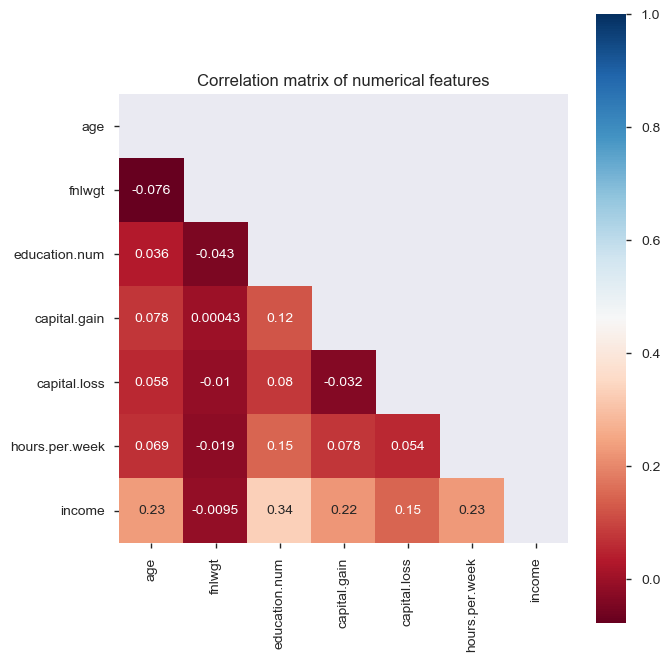

In [114]:
df_corr=df
corr=df_corr.corr()
plt.subplots(figsize=(7,7));
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, cmap="RdBu", square=True, mask=mask)
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

A Correlation Matrix is shown in the form of a HeatMap showing Feature-to-Feature and Feature-to-Label Pearson 
Correlations where all the features are Continuous Variables. correlation explains the relationship between variable or feature, i.e how they relate with each other. For instance, an increase in education years will leads a 0.34(34%) increase in in income. To understand better let's use the pair plot.

### HYPOTHESIS TESTING:

In [115]:
import scipy.stats as stats
import math

Null Hypothesis: the mean of capital gain and lose are equal.

Alternate Hypothesis: the mean of capital gain and capital lose are not equal and statistically different from each other.

confident level(%): 5%

In [116]:
c_mean=df['capital.gain'].mean()
c_mean1=df['capital.loss'].mean()
print('The mean of capital_gain is', c_mean)
print('The mean of capital_loss is', c_mean1)

The mean of capital_gain is 1078.4437409718166
The mean of capital_loss is 87.36822694163568


In [145]:
stats.ttest_ind(a=df['capital.gain'],
               b=df['capital.loss'],
               equal_var=False)

Ttest_indResult(statistic=24.16159643615963, pvalue=7.453634793472392e-128)

There is statistical difference between in the weight of capital gain and capital loss. Therefore we will fail to accept the null hypothesis. This is because the p-value is less than significant level of 5%.

## USING MACHINE LEARNING MODEL TO PREDICT INCOME:

So income will be the dependent variable while other features will be the independent variable which explains the variation in income i.e the independent variable actually determine of affect the dependent variable which is income. 

In [118]:
y=df['income']
X=df[['age', 'education.num', 'hours.per.week']]

In [119]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix, recall_score, classification_report

After importing libery we split our data in training and testing size. 10% for testing and 90% for training.

In [162]:
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.1,random_state=1) 

In [163]:
print(x_test.shape)
print(x_train.shape)

(3254, 3)
(29283, 3)


## MODEL BUILDING

In [164]:
log_model = LogisticRegression(max_iter=2000)
score=cross_val_score(estimator=log_model, X=x_train, y=y_train, cv=5, scoring='roc_auc')
print(score)
print('mean:', score.mean())

[0.80366774 0.79884065 0.80117252 0.79786524 0.79253789]
mean: 0.7988168093262443


In [165]:
decision_tree=DecisionTreeClassifier(max_depth=10, random_state=1,
                                    splitter='best', criterion='gini')
score=cross_val_score(estimator=decision_tree, X=x_train, y=y_train, cv=5, scoring='roc_auc')
print(score)
print('mean:', score.mean())

[0.78703976 0.79448439 0.79284676 0.79439238 0.78819964]
mean: 0.791392586913408


In [166]:
random_classifier=RandomForestClassifier(n_estimators=200, oob_score=True,
                                        n_jobs=-1, random_state=1, max_features='auto',
                                        max_leaf_nodes=15)
score=cross_val_score(estimator=random_classifier, X=x_train, y=y_train, cv=5, scoring='roc_auc')
print(score)
print('mean:', score.mean())

[0.81638206 0.81491187 0.8182321  0.82002195 0.81270853]
mean: 0.8164513007104167


we use cross validation score to get the best machince learning libery to use and above shows that RANDOM FOREST is the accurate machine learning libery to use because it's has the highest score mean which is 81%. So we will make use of Random Forest to predict income.

## CHECKING FEATURE IMPORTANCE

In [167]:
random_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=15,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [168]:
for score, name in sorted(zip(random_classifier.feature_importances_, x_train.columns), reverse=True):
    print('feature importance of', name, ':', score*100, '%')

feature importance of education.num : 43.453714278246224 %
feature importance of age : 34.16210076918722 %
feature importance of hours.per.week : 22.384184952566528 %


Text(0.5, 1.0, 'Feature importance of each features to the dependent variable')

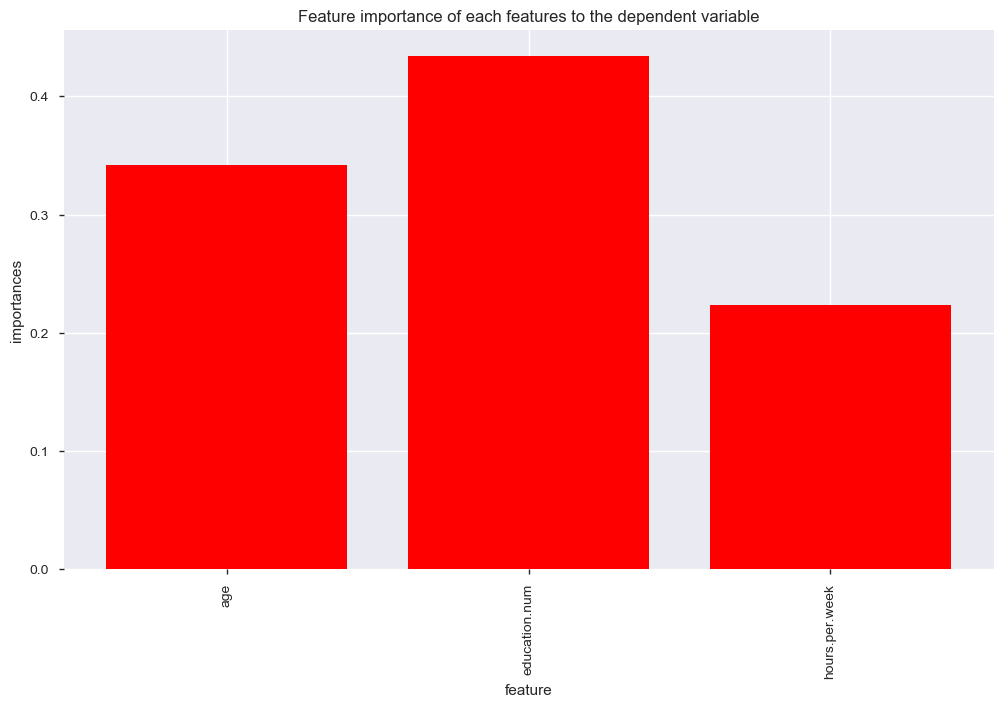

In [169]:
plt.figure(figsize=(12, 7))
plt.bar(x_train.columns, random_classifier.feature_importances_, color='red')
plt.xlabel('feature')
plt.ylabel('importances')
plt.xticks(rotation=90)
plt.title("Feature importance of each features to the dependent variable")

This means education.num (i.e No of years educated) has 43% effect on explaining the variation or in determining the income, while age has 34% and work hour 22%.

## HYPERPARAMETER TUNNING

This helps to choosing a set of optimal hyperparameters for learning algorithm. It's helps us to control the learning process of our algorithm.

In [170]:
param_grid=[{'n_estimators' : [300, 400, 500],
             'max_depth'   : [None, 8, 15, 30, 40],
             'max_features' : ['auto']
    }]

In [171]:
model=RandomForestClassifier(n_jobs=-1, random_state=0)
grid_search=GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

In [172]:
%%time
grid_search.fit(x_train, y_train)

Wall time: 5min 19s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'n_estimators': [300, 400, 500], 'max_depth': [None, 8, 15, 30, 40], 'max_features': ['auto']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [173]:
grid_search.best_score_

0.8188597111078667

In [174]:
grid_search.best_params_

{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}

In [175]:
best_model=grid_search.best_estimator_

In [176]:
best_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [177]:
y_predicted=best_model.predict(x_test)

In [178]:
import pickle
pickle.dump(best_model, open('randomforest.pki', 'wb'))

## MODEL EVALUATION:

In [179]:
confusion_mat=pd.DataFrame(confusion_matrix(y_test, y_predicted))

In [180]:
confusion_mat.index=['actually earn less than 50k', 'actually earn more than 50k']
confusion_mat.columns=['predicted earn less than 50k', 'predicted earn more than 50k']
confusion_mat

,predicted earn less than 50k,predicted earn more than 50k
actually earn less than 50k,2332,155
actually earn more than 50k,469,298


The confusion matrix above shows the predicting ability of our model.

#### TESTING THE ACCURACY OF THE MODEL:

In [181]:
accuracy=accuracy_score(y_test, y_predicted)
print('The accuracy score of our model is:', accuracy)

The accuracy score of our model is: 0.8082360172095882


This means our random forest model is 80% accurate in predicting INCOME. which is a very good result.

In [182]:
precision_accuracy=precision_score(y_test, y_predicted)
print('The precision_accuracy score of our model is:', precision_accuracy)

The precision_accuracy score of our model is: 0.6578366445916115


precision score: is the ratio of correct positive prediction to total numbers of correct positive prediction. it's measure how precise classifier is when predicting true positive. i.e True Positive/True Positive + False Positive I.e it's the rate of predicting the true positive rightly. so 68% of those who actually earn more than 50k were predicted rightly.

In [183]:
recall_score_accuracy=recall_score(y_test, y_predicted)
print('The recall_score_accuracy of our model is:', recall_score_accuracy)

The recall_score_accuracy of our model is: 0.38852672750977835


Recall: is the ratio of correct positive prediction to total numbers of positive prediction. i.e No. correct positive prediction/total number of positive prediction. it's measure how sensitive classifier is for detecting postive instances. i.e True Positive/True Positive + False Negative. so 38% of correct positive prediction depending of the total positive prediction was made.

In [190]:
y_sample=x_test.sample(10)
y_pred_sample=best_model.predict(y_sample)
y_sample['y_pred_sample']=y_pred_sample
y_sample

,age,education.num,hours.per.week,y_pred_sample
23085,35,9,45,0
21172,45,13,51,1
3847,62,4,40,0
6011,37,13,30,0
8305,60,11,15,0
27346,44,14,40,1
23772,33,9,40,0
9031,50,3,55,0
26999,22,10,30,0
13622,55,9,40,0


Above is predicting sample data, Remember 0 means <50k and 1 means >50k so picking the first row in the sample dataset means that an individual whose age is 35, whose numbers of years been educated is 9 and whose work hour is 45 is predicted as a low income earner (<50k). while the second sample explains that a 45 years old individual with 13 years been educated and work 51 hour per week is predicted a higher income earner (>50k). from this above sample it's obvoius that the No of years been educated has alot of effect in detrermining income of an individual.

### CONCLUSION 

This project was aimed at analysing the adult income census of different individual in a country and predicting the income of these individual based on the features assigned to determine the income. In terms of analysing, descriptive and inferential statististics was our major tool. Then we determine the corelation i.e relationship between variable and we use the help of t_test to determine if the capital gain and lose are statistical significant and then we used mechine learning algorithm of which random forest was the appropiate machine learning model to used which has the accurate mean of 81%. 

THANK YOU!!!